### Poisson equation example

The generalized form of the equations solved in this package looks like, 
    $$ \alpha \frac{\partial \varphi}{\partial t} + \nabla\cdot\left(\vec{u}\varphi\right) + \nabla\cdot\left(-D\nabla\varphi\right) + \beta \varphi = \gamma $$

with boundary condition,
    $$ a\nabla\varphi\cdot \vec{e} + b\varphi = c $$.


The inhomogeneous Poisson equation
    $$ \nabla^2 \varphi + s\left(\vec{x}\right) = 0 $$

can be generalized to a simple 1D case,

\begin{align}
    \frac{\partial^2 \varphi}{\partial ^2 x}  + s\left(x\right) &= 0 \\
    \varphi\left(x_L\right) &= 0 \\
    \frac{\partial \varphi}{\partial x}|_{x_R} &= 0
\end{align}    

The corresponding equation in our form has 
\begin{align}
    D = 1.0, \vec{u} &= \vec{0}  \\
    \alpha = 0, \beta = 0, \gamma &= s  \\
    a_L = 0, b_L = 1, c_L &= 0 \\
    a_R = 1, b_R = 0, c_R &= 0 \\    
\end{align}

see this link
http://scicomp.stackexchange.com/questions/8577/peculiar-error-when-solving-the-poisson-equation-on-a-non-uniform-mesh-1d-only

Strange behavior when change the number of grids from even to odd
Wrong results does not always mean that the code has bugs.

Wrong use of the code can also give you wrong results

 Written by Ali A. Eftekhari
 Last checked: June 2021
 
 Ported to python and full rewrite by Gavin M. Weir June, 2023


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# explicit imports as an alternative to `import pyfvtool as pf`
from pyfvtool import Grid1D
from pyfvtool import cellLocations, CellVariable
from pyfvtool import faceLocations, FaceVariable
from pyfvtool import BoundaryConditions
from pyfvtool import diffusionTerm
from pyfvtool import constantSourceTerm
from pyfvtool import boundaryConditionsTerm
from pyfvtool import solveMatrixPDE
from pyfvtool import visualizeCells

In [3]:
# Define the domain and create a mesh structure
L = 20      # domain length
# Nx = 10000  # number of cells (original)
Nx = 100000  # number of cells (test)
m = Grid1D(Nx, L)

# Create the boundary condition structure
BC = BoundaryConditions(m)  # Neumann boundary conditions 

# left-boundary:
BC.left.a[:] = 0.0
BC.left.b[:] = 1.0
BC.left.c[:] = 0.0

# right-boundary (Neumann is the default in this package)
BC.right.a[:] = 1.00 
BC.right.b[:] = 0.0 
BC.right.c[:] = 0.0

x = m.cellcenters.x-0.5*L; # shift the domain to [-10,10]

# define the transfer coeffs
D_val = 1;
D = FaceVariable(m, D_val);

# define source term
def rho(x):
    # rho = @(x)(-1.0*((x>=-1.0)&(x<=0))+((x>0)&(x<=1)));
    return -1.0*((x>=-1.0)*(x<=0))+(x>0)*(x<=1)

s1 = constantSourceTerm(CellVariable(m, rho(x)))
Mdiff = diffusionTerm(D)
Mbc, RHSbc = boundaryConditionsTerm(BC)

M = Mdiff + Mbc
RHS = -s1+RHSbc
c = solveMatrixPDE(m, M, RHS)

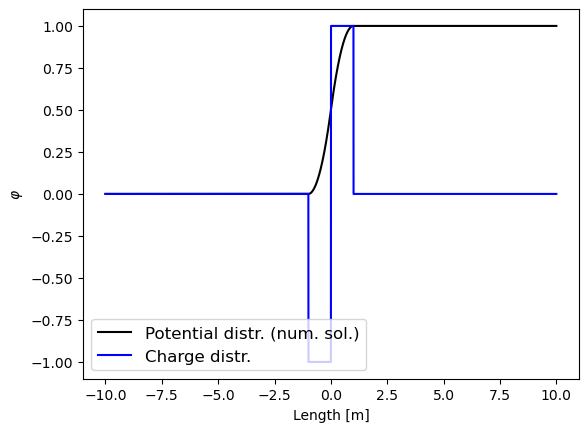

In [4]:
# visualization
plt.figure()
plt.plot(x, c.value, 'k-', label='Potential distr. (num. sol.)')
plt.plot(x, rho(x), 'b-', label='Charge distr.')
plt.xlabel('Length [m]')
plt.ylabel(r'$\varphi$')
plt.legend(fontsize=12, loc='best');

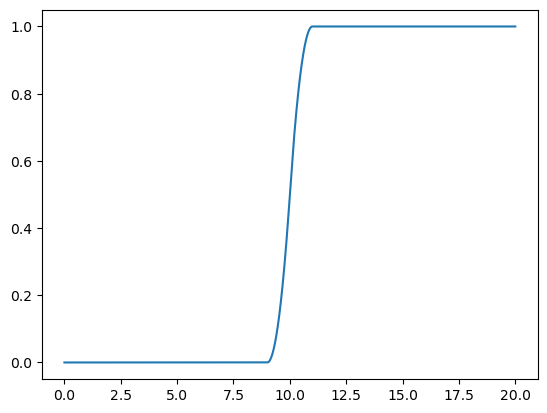

In [5]:
# Utility to peek at solution 
plt.figure()
visualizeCells(phi=c, vmin=0.0, vmax=0.0, cmap="viridis", shading="gouraud")